In [1]:
from bs4 import BeautifulSoup
import urllib3
import re
import time
from collections import defaultdict
import numpy as np
import tqdm
import requests

In [2]:
#get the data using url

In [3]:
url = "https://www.musees.strasbourg.eu/musee-des-beaux-arts"

b'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\t\n\t\t\n\t\t\t<!DOCTYPE html>\r\n\r\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\r\n\r\n<html class="ltr" dir="ltr" lang="fr-FR">\r\n\r\n    <head>\r\n        <title>Mus\xc3\xa9e des Beaux-Arts - Mus\xc3\xa9es de Strasbourg</title>\r\n\r\n        <meta content="initial-scale=1.0, width=device-width" name="viewport"/>\r\n\r\n        <link type="text/css" rel="stylesheet" href="/o/0-global-theme/css/hackliferay.css"/>\r\n        <link rel="stylesheet" href="https://www.musees.strasbourg.eu/o/museum-v2-theme/css/builders/swiper.min.css"/>\r\n        <link type="text/css" rel="stylesheet" href="https://www.musees.strasbourg.eu/o/museum-v2-theme/css/museum-v2.css" media="screen"/>\r\n\r\n\r\n        <script type="text/javascript" src="/o/0-global-theme/libs/tarteaucitron/tarteaucitron.js"></script>\r\n        <script type="text/javascript" src="/
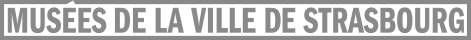

In [4]:
#get the page data (messier)
page = requests.get(url)
page.content

In [5]:
#page.content

In [6]:
#parse the data (make it more presentable) using beautifulsoup
soup = BeautifulSoup(page.content, 'html.parser')
#print(soup.prettify())

In [7]:
#now that it is clan we are going to use regular expression

In [43]:
#page.text

In [9]:
name = re.findall(r'<title>(.*?)</title>', page.text)[0]
#on a extrait le titre et avec [0] on affiche seulement le premier titre

In [10]:
description = re.findall(r'<p>(.*?)</p>', page.text)[2]
#est toujours 
print(description)

Ses collections sont parallèles pour le Moyen Âge et la Renaissance rhénans à celles du Musée de l’Œuvre Notre-Dame et se prolongent ensuite au Musée d’Art moderne et contemporain.


In [11]:
price = re.findall(r'<p>(.*?)</p>', page.text)[0]
print(price)

<strong>Tarif plein : 7€50&nbsp;— Tarif réduit : 3€50</strong>


In [12]:
ticket_price = re.sub(r'&nbsp;', '  ', re.findall(r'<strong>(.*?)</strong>', price)[0])
#re.sub avec cette commande on a remplacé &nbsp par rien puis on a extrait tout ce qui est entre <strong> et </strong> via la commande re.findall 
print(ticket_price)

Tarif plein : 7€50  — Tarif réduit : 3€50


In [13]:
time = soup.find('div', class_=re.compile(r'des+'))
print(time)

<div class="description"><p><strong>Ouvert tous les jours sauf le mardi et jeudi<br/>
De 10h à 13h et de 14h à 18h</strong></p>
<p><strong>Tarif plein : 7€50 — Tarif réduit : 3€50</strong></p></div>


In [14]:
horaire = time.text

In [15]:
days_opening = horaire.split('\n')[0]
print(days_opening)

Ouvert tous les jours sauf le mardi et jeudi


In [16]:
hours_opening = horaire.split('\n')[1]
print(hours_opening)

De 10h à 13h et de 14h à 18h


In [17]:
print(name)
print(description)
print(ticket_price)
print(days_opening)
print(hours_opening)

Musée des Beaux-Arts - Musées de Strasbourg
Ses collections sont parallèles pour le Moyen Âge et la Renaissance rhénans à celles du Musée de l’Œuvre Notre-Dame et se prolongent ensuite au Musée d’Art moderne et contemporain.
Tarif plein : 7€50  — Tarif réduit : 3€50
Ouvert tous les jours sauf le mardi et jeudi
De 10h à 13h et de 14h à 18h


In [18]:
Museums = {name:[description, ticket_price, days_opening, hours_opening]}
#print(Museums)

In [19]:
content = soup.find_all("section",{"id" : "headerMuseum"})
#print(content)

In [20]:
#Boucle pour enregistrer toutes les infos sur le musée des BEAUX-ARTS

museum_BA = dict()
for element in page:
    name = re.findall(r'<title>(.*?)</title>', page.text)[0]
    description = re.findall(r'<p>(.*?)</p>', page.text)[2]
    ticket_price = re.sub(r'&nbsp;', '  ', re.findall(r'<strong>(.*?)</strong>', price)[0])
    horaire = time.text
    days_opening = horaire.split('\n')[0]
    hours_opening = horaire.split('\n')[1]

    museum_BA.update({name:[description, ticket_price, days_opening, hours_opening]})


In [21]:
print(museum_BA)

{'Musée des Beaux-Arts - Musées de Strasbourg': ['Ses collections sont parallèles pour le Moyen Âge et la Renaissance rhénans à celles du Musée de l’Œuvre Notre-Dame et se prolongent ensuite au Musée d’Art moderne et contemporain.', 'Tarif plein : 7€50  — Tarif réduit : 3€50', 'Ouvert tous les jours sauf le mardi et jeudi', 'De 10h à 13h et de 14h à 18h']}


In [22]:
#on va mettre les liens url pour tous les musées

In [114]:
# on fair une requête GET pour obtenir le contenu HTML de la page
page = requests.get("https://www.musees.strasbourg.eu/decouvrir")
# on utilise BeautifulSoup pour analyser le HTML
soup = BeautifulSoup(page.content, 'html.parser')
# on cherche toutes les infos dans 'section'
liste = soup.find('section', {'id': 'rubric', 'class': 'margin-bottom'})

print(liste)

<section class="margin-bottom" id="rubric">
<div class="content container">
<div class="list">
<a aria-label="Musée Archéologique" class="rubric-thumbnail" href="/musee-archeologique" style="background-image: url(/documents/30424/420085467/MAS_2022_01.jpg/12da7565-64af-e7c1-9193-feeb62f484e7?t=1675342271751);" title="Musée Archéologique">
<div class="info">
<div class="title">
<span>Musée Archéologique</span>
</div>
</div>
</a>
<a aria-label="Musée des Beaux-Arts" class="rubric-thumbnail" href="/musee-des-beaux-arts" style="background-image: url(/documents/30424/508640/mba_mai2015_2.jpg/9bd88370-288a-3cf3-6ce1-7720798dc055?t=1481549356308);" title="Musée des Beaux-Arts">
<div class="info">
<div class="title">
<span>Musée des Beaux-Arts</span>
</div>
</div>
</a>
<a aria-label="Musée des Arts Décoratifs" class="rubric-thumbnail" href="/musee-des-arts-decoratifs" style="background-image: url(/documents/30424/509229/palais_rohan_cote_Ill_mb_2.jpg/e36718b5-08c7-075c-bf29-07f5767d6e1b?t=1482

In [120]:
liste = str(liste).split("aria-label=")[1:]

In [121]:
liste[0]

'"Musée Archéologique" class="rubric-thumbnail" href="/musee-archeologique" style="background-image: url(/documents/30424/420085467/MAS_2022_01.jpg/12da7565-64af-e7c1-9193-feeb62f484e7?t=1675342271751);" title="Musée Archéologique">\n<div class="info">\n<div class="title">\n<span>Musée Archéologique</span>\n</div>\n</div>\n</a>\n<a '

In [129]:
cleaned_links = {}

for link in liste:
    name = re.findall(r'<span>(.*?)</span>', str(link))[0]
    link = 'https://www.musees.strasbourg.eu'+re.findall('href="(.*?)" style', str(link))[0]
    cleaned_links.update({name:link})
cleaned_links

{'Musée Archéologique': 'https://www.musees.strasbourg.eu/musee-archeologique',
 'Musée des Beaux-Arts': 'https://www.musees.strasbourg.eu/musee-des-beaux-arts',
 'Musée des Arts Décoratifs': 'https://www.musees.strasbourg.eu/musee-des-arts-decoratifs',
 'Musée d’Art moderne et contemporain': 'https://www.musees.strasbourg.eu/musee-d-art-moderne-et-contemporain',
 'Musée Historique': 'https://www.musees.strasbourg.eu/musee-historique',
 'Musée Alsacien': 'https://www.musees.strasbourg.eu/musee-alsacien',
 'Musée de l’Œuvre Notre-Dame': 'https://www.musees.strasbourg.eu/musee-de-l-oeuvre-notre-dame',
 'Musée Tomi Ungerer\xa0– Centre international de l’Illustration': 'https://www.musees.strasbourg.eu/musee-tomi-ungerer',
 'Musée Zoologique': 'https://www.musees.strasbourg.eu/musee-zoologique',
 'Aubette 1928': 'https://www.musees.strasbourg.eu/aubette-1928',
 'Cabinet des Estampes et des Dessins': 'https://www.musees.strasbourg.eu/cabinet-des-estampes-et-des-dessins',
 'Bibliothèque des 

In [110]:
url = "https://www.musees.strasbourg.eu/musee-d-art-moderne-et-contemporain"
page1 = requests.get(url)
soup = BeautifulSoup(page1.content, 'html.parser')

price1 = re.findall(r'<p>(.*?)</p>', page1.text)[0]

time1 = time = soup.find('div', class_=re.compile(r'des+'))

museum_art_moderne = dict()
for element in page1:
    name = re.findall(r'<title>(.*?)</title>', page1.text)[0]
    description = re.findall(r'<p>(.*?)</p>', page1.text)[1]
    ticket_price = re.sub(r'&nbsp;', '  ', re.findall(r'<strong>(.*?)</strong>', price)[0])
    horaire = time1.text
    days_opening = horaire.split('\n')[0]
    hours_opening = horaire.split('\n')[1]

    museum_art_moderne.update({name:[description, ticket_price, days_opening, hours_opening]})


In [111]:
print(museum_art_moderne)

{'Musée d&#39;Art moderne et contemporain - Musées de Strasbourg': ['Gustave Doré, Monet, Rodin, Gauguin, Käthe Kollwitz, Arp et Sophie Taeuber, Max Beckmann, Picasso, Kandinsky, Marcelle Cahn, Niki de Saint-Phalle, Nam June Paik, Georg Baselitz, Bertrand Lavier, Annette Messager, Alain Séchas, Xavier Veilhan, Clément Cogitore… sont parmi les peintres, sculpteurs, graveurs, photographes, vidéastes, que l’on rencontre au fil de sa visite.', 'Tarif plein : 7€50  — Tarif réduit : 3€50', 'Ouvert tous les jours sauf le lundi et le mercredi', 'De 10h à 13h et de 14h à 18h']}
